<h1 align=center><font size = 6>Finding the right neighbourhood to settle in Paris</font></h1>
<h1 align=center><font size = 3>Applied Data Science Capstone by IBM/Coursera</font></h1>
<h1 align=center><font size = 1>Ilan Benchetrit</font></h1>

## Table of contents
1. [Introduction: Business Problem](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis](#analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)
7. [Sources](#sources)

## I - Introduction: Business Problem <a name="introduction"></a>

Paris is the largest metropole in France where over 2 million people live in 105.4 square kilometres. Then it has a population density of 21.067 people per square kilometre making of **the city of Paris the 7th most dense city in the world**. The city is divided into 80 neighbourhoods in total. [1]

On a personal point of view, I decided to work with Paris data in this project because I live in this city. Moreover, I chose Paris because I personally had to face the issue that I am trying to solve in this paper. I had to move to Paris to study so **I had to find an affordable flat** for my student purse. However, I did not want to live in a dormitory neighbourhood as **I really like living venues**. The problem was for me to **find a neighbourhood that would meet all my expectations**.

When we consider this problem, we can create a map and information chart where rents are shown and neighbourhoods clustered according to the venue density and its average rent.

## II - Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* Average rent per neighbourhood ;
* Geometry and location of each neighbourhood ;
* Number of venues and their type and location in every neighbourhood.

Following data sources will be needed to extract/generate the required information:
* First, we extract the median rents (€/m2) in function of neighbourhood, furnishing, building year of construction and number of rooms. This king of data will be obtained using **Paris Data databases**. [2]
* Then, we extract geometry and centre location of each neighbourhood in both CSV and GeoJSON format using **Paris Data databases**. [3]
* Finally, we extract the number of restaurants and their type and location in every neighbourhood thanks to the **Foursquare API**. [4]

Before getting to the data and start exploring it, let's download all the dependencies that we will need for this project.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

# import yellowbrick to do some Machine Learning Visualization
!conda install -c districtdatalabs yellowbrick --yes
from yellowbrick.cluster import KElbowVisualizer

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: | 
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0
  - defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.

Solving environment: - 
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0
  - defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35ccdone

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package     

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Solving environment: | 
  - anaconda/osx-64::ca-certificates-2020.1.1-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_4
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_4, defaults/osx-64::ca-certificates-2020.1.1-0
  - anaconda/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35cc_4
  - defaults/osx-64::ca-certificates-2020.1.1-0, defaults/osx-64::openssl-1.1.1d-h1de35ccdone

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         148 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge





### Rent data

Let's download the Paris rent database and store into a Pandas dataframe

In [2]:
!wget -q -O 'paris_rent.csv' https://raw.githubusercontent.com/Techneb/Untitled/master/paris_rent.csv
print('Data downloaded!')

paris_rent = pd.read_csv('paris_rent.csv', sep = ';')
paris_rent

Data downloaded!


,Secteurs géographiques,Numéro du quartier,Nom du quartier,Nombre de pièces principales,Epoque de construction,Type de location,Loyers de référence,Loyers de référence majorés,Loyers de référence minorés,Année,Ville,Numéro INSEE du quartier,geo_shape,geo_point_2d
0,2,1,St-Germain-l'Auxerrois,1,1946-1970,meublé,35.9,43.1,25.1,2017,PARIS,7510101,"{""type"": ""Polygon"", ""coordinates"": [[[2.344593...","48.8606501352,2.33491032928"
1,5,2,Halles,1,1946-1970,non meublé,26.4,31.7,18.5,2017,PARIS,7510102,"{""type"": ""Polygon"", ""coordinates"": [[[2.349365...","48.8622891081,2.34489885831"
2,5,2,Halles,2,Apres 1990,meublé,27.7,33.2,19.4,2017,PARIS,7510102,"{""type"": ""Polygon"", ""coordinates"": [[[2.349365...","48.8622891081,2.34489885831"
3,5,2,Halles,3,Apres 1990,meublé,27.0,32.4,18.9,2017,PARIS,7510102,"{""type"": ""Polygon"", ""coordinates"": [[[2.349365...","48.8622891081,2.34489885831"
4,2,4,Place-Vendôme,1,1946-1970,meublé,35.9,43.1,25.1,2017,PARIS,7510104,"{""type"": ""Polygon"", ""coordinates"": [[[2.331944...","48.8670185906,2.32858166493"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,9,70,Clignancourt,3,1946-1970,meublé,20.3,24.4,14.2,2017,PARIS,7511870,"{""type"": ""Polygon"", ""coordinates"": [[[2.351678...","48.8916675911,2.34597875459"
2556,11,71,Goutte-d'Or,3,Apres 1990,non meublé,20.4,24.5,14.3,2017,PARIS,7511871,"{""type"": ""Polygon"", ""coordinates"": [[[2.349667...","48.8921381876,2.3555361633"
2557,11,71,Goutte-d'Or,3,Apres 1990,meublé,23.1,27.7,16.2,2017,PARIS,7511871,"{""type"": ""Polygon"", ""coordinates"": [[[2.349667...","48.8921381876,2.3555361633"
2558,13,72,La Chapelle,3,1946-1970,meublé,18.5,22.2,13.0,2017,PARIS,7511872,"{""type"": ""Polygon"", ""coordinates"": [[[2.365803...","48.8940121696,2.36438677903"


Then, let's download the Paris neighbourhood location database and store into a Pandas dataframe

In [3]:
!wget -q -O 'paris_locations.csv' https://raw.githubusercontent.com/Techneb/Untitled/master/paris_locations.csv
print('Data downloaded!')

paris_locations = pd.read_csv('paris_locations.csv', sep = ';')
paris_locations

Data downloaded!


,N_SQ_QU,C_QU,C_QUINSEE,L_QU,C_AR,N_SQ_AR,PERIMETRE,SURFACE,Geometry X Y,Geometry
0,750000017,17,7510501,Saint-Victor,5,750000005,3087.215040,6.041561e+05,"48.8476636355,2.35409315338","{""type"": ""Polygon"", ""coordinates"": [[[2.354921..."
1,750000031,31,7510803,Madeleine,8,750000008,3791.509735,7.607266e+05,"48.871265493,2.32005302865","{""type"": ""Polygon"", ""coordinates"": [[[2.325031..."
2,750000078,78,7512002,Saint-Fargeau,20,750000020,5405.036433,1.486971e+06,"48.8710347391,2.40617153015","{""type"": ""Polygon"", ""coordinates"": [[[2.413813..."
3,750000063,63,7511603,Porte-Dauphine,16,750000016,7447.041546,3.086718e+06,"48.8717656343,2.27191774047","{""type"": ""Polygon"", ""coordinates"": [[[2.270984..."
4,750000069,69,7511801,Grandes-Carrières,18,750000018,6398.474434,1.905566e+06,"48.8925777711,2.33436308991","{""type"": ""Polygon"", ""coordinates"": [[[2.340216..."
...,...,...,...,...,...,...,...,...,...,...
75,750000055,55,7511403,Petit-Montrouge,14,750000014,5490.636672,1.345774e+06,"48.8266526255,2.32643699922","{""type"": ""Polygon"", ""coordinates"": [[[2.329136..."
76,750000074,74,7511902,Pont-de-Flandre,19,750000019,6397.871676,2.376238e+06,"48.8955557746,2.38477722927","{""type"": ""Polygon"", ""coordinates"": [[[2.384878..."
77,750000062,62,7511602,Muette,16,750000016,11962.438594,5.477898e+06,"48.8632745438,2.2599358317","{""type"": ""Polygon"", ""coordinates"": [[[2.245624..."
78,750000064,64,7511604,Chaillot,16,750000016,5207.046446,1.424035e+06,"48.8684336145,2.29167904274","{""type"": ""Polygon"", ""coordinates"": [[[2.292681..."


Now, let's merge those two dataframes into one (thanks to the Neighbourhood number colmun) and keep only usefull columns

In [4]:
#Merging the two dataframes into one
data = pd.merge(paris_rent,
                paris_locations[['C_QU', 'Geometry X Y', 'Geometry']],
                left_on = 'Numéro du quartier',
                right_on = 'C_QU',
                how='left',
                indicator = True)

#Only keeping usefull columns
data = data[['Numéro du quartier',
             'Nom du quartier',
             'Nombre de pièces principales',
             'Epoque de construction',
             'Type de location',
             'Loyers de référence',
             'Geometry X Y',
             'Geometry']]

#Colmuns' labels are in French so let's translate them into English
data.rename(columns={'Numéro du quartier': 'Neighbourhood number',
                     'Nom du quartier': 'Neighbourhood',
                     'Nombre de pièces principales': 'Number of rooms',
                     'Epoque de construction': 'Year of consutruction',
                     'Type de location': 'Furnished',
                     'Loyers de référence': 'Median rent',
                     'Geometry X Y': 'Centre location'}, inplace=True)

data

,Neighbourhood number,Neighbourhood,Number of rooms,Year of consutruction,Furnished,Median rent,Centre location,Geometry
0,1,St-Germain-l'Auxerrois,1,1946-1970,meublé,35.9,"48.8606501352,2.33491032928","{""type"": ""Polygon"", ""coordinates"": [[[2.344593..."
1,2,Halles,1,1946-1970,non meublé,26.4,"48.8622891081,2.34489885831","{""type"": ""Polygon"", ""coordinates"": [[[2.349365..."
2,2,Halles,2,Apres 1990,meublé,27.7,"48.8622891081,2.34489885831","{""type"": ""Polygon"", ""coordinates"": [[[2.349365..."
3,2,Halles,3,Apres 1990,meublé,27.0,"48.8622891081,2.34489885831","{""type"": ""Polygon"", ""coordinates"": [[[2.349365..."
4,4,Place-Vendôme,1,1946-1970,meublé,35.9,"48.8670185906,2.32858166493","{""type"": ""Polygon"", ""coordinates"": [[[2.331944..."
...,...,...,...,...,...,...,...,...
2555,70,Clignancourt,3,1946-1970,meublé,20.3,"48.8916675911,2.34597875459","{""type"": ""Polygon"", ""coordinates"": [[[2.351678..."
2556,71,Goutte-d'Or,3,Apres 1990,non meublé,20.4,"48.8921381876,2.3555361633","{""type"": ""Polygon"", ""coordinates"": [[[2.349667..."
2557,71,Goutte-d'Or,3,Apres 1990,meublé,23.1,"48.8921381876,2.3555361633","{""type"": ""Polygon"", ""coordinates"": [[[2.349667..."
2558,72,La Chapelle,3,1946-1970,meublé,18.5,"48.8940121696,2.36438677903","{""type"": ""Polygon"", ""coordinates"": [[[2.365803..."


As we want to do a choropleth map with rent data, we need to make the average of median rents per neighbourhood.
We are only taking in consideration furnished flats because they are more expensive by nature than non-furnished flats. To avoid this biais, we would rather remove them from the calculation.

In [5]:
# Calculating average rent
cdf = pd.DataFrame(columns=['Average rent'])
cdf['Average rent'] = data.groupby(['Neighbourhood','Furnished']).mean()['Median rent']
cdf = cdf.reset_index()

# Some formating
cdf = pd.merge(cdf,
               data[['Neighbourhood', 'Centre location', 'Geometry']],
               on = 'Neighbourhood',
               how = 'left')
cdf = cdf.drop_duplicates().reset_index()
cdf = cdf.drop(columns='index')

cdf = cdf.loc[cdf['Furnished'] == 'meublé']
cdf = cdf.reset_index()
cdf = cdf.drop(columns='index')
cdf

,Neighbourhood,Furnished,Average rent,Centre location,Geometry
0,Amérique,meublé,21.85625,"48.8816381673,2.39544016662","{""type"": ""Polygon"", ""coordinates"": [[[2.409402..."
1,Archives,meublé,28.28750,"48.8591924127,2.36320505733","{""type"": ""Polygon"", ""coordinates"": [[[2.368479..."
2,Arsenal,meublé,29.61875,"48.851585175,2.36476795387","{""type"": ""Polygon"", ""coordinates"": [[[2.368512..."
3,Arts-et-Metiers,meublé,28.28750,"48.8664702895,2.35708313106","{""type"": ""Polygon"", ""coordinates"": [[[2.360209..."
4,Auteuil,meublé,26.66875,"48.8506223427,2.25227690754","{""type"": ""Polygon"", ""coordinates"": [[[2.249224..."
...,...,...,...,...,...
75,St-Germain-l'Auxerrois,meublé,29.61875,"48.8606501352,2.33491032928","{""type"": ""Polygon"", ""coordinates"": [[[2.344593..."
76,Ternes,meublé,27.79375,"48.8811775503,2.28996373812","{""type"": ""Polygon"", ""coordinates"": [[[2.295039..."
77,Val-de-Grace,meublé,28.28750,"48.841684288,2.34386092632","{""type"": ""Polygon"", ""coordinates"": [[[2.345484..."
78,Villette,meublé,21.85625,"48.8876610888,2.37446821213","{""type"": ""Polygon"", ""coordinates"": [[[2.370498..."


For the need of the choropleth map, using Folium we must use neighbourhood geometry data in GeoJSON format, so let's assign the GeoJSON file URL on my GitHub repository to one variable called paris_data.

In [6]:
!wget -q -O 'paris_data.json' https://raw.githubusercontent.com/Techneb/Untitled/master/paris_data2.geojson
print('Data downloaded!')

with open('paris_data.json') as json_data:
    paris_data = json.load(json_data)

paris_data

Data downloaded!


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[2.354921992333764, 48.84377978153837],
      [2.354916821826702, 48.84364477301268],
      [2.352756514576737, 48.84369428987304],
      [2.3496429954469322, 48.84439281929226],
      [2.349488467648587, 48.84443960211208],
      [2.349336686846597, 48.84448734759909],
      [2.349244542106854, 48.84451631667142],
      [2.349116936007325, 48.845314076882694],
      [2.349153688796214, 48.845701656548485],
      [2.349092072091641, 48.84615697491523],
      [2.349061464964579, 48.8463625459397],
      [2.348868963494554, 48.84701490195477],
      [2.348697979234732, 48.84713237099403],
      [2.348652346239482, 48.8471705935508],
      [2.348619252077524, 48.84721681760462],
      [2.348480202983191, 48.847510176035534],
      [2.34853667755064, 48.8478088197449],
      [2.34849469725367, 48.84854006265998],
      [2.348788381847692, 48.849266177817924],
      [2.349

In [7]:
# Create the map
address = 'Paris, FR'

from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

mapp = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add colors to the map
folium.Choropleth(
    geo_data=paris_data,
    name='Average rent in Paris',
    data=cdf,
    columns=['Neighbourhood', 'Average rent'],
    key_on='feature.properties.l_qu',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average rent'
).add_to(mapp)

folium.LayerControl().add_to(mapp)
mapp

### Foursquare data

First, let's Create a map of Paris with neighbourhoods superimposed on top.

In [8]:
# Create the map
address = 'Paris, FR'

from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="paris_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add markers to map
for location, neighbourhood in zip(cdf['Centre location'], cdf['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [location.split(',')[0], location.split(',')[1]],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

Then, let's create a function to explore all the neighbourhoods in Paris and retreive all venues around the centre location of each neighbourhood.

*My Foursquare credentials are willingly not shown, but code cell including them was just down there*

In [9]:
CLIENT_ID = 'IWR4ZOL3UDN2WMELH1EE3RXF02PLJD5KF3ZZZRTND4XS2W4U'
CLIENT_SECRET = 'CKPX1DL4B0GKUK2SJ4PPIK525FIM5EF5J2YWAJG0WPE3VQRM'
VERSION = '20200401'

In [10]:
def getNearbyVenues(names, locations, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, location in zip(names, locations):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            location,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            location,
            v['venue']['name'], 
            v['venue']['location'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Location',  
                  'Venue',
                  'Venue Location', 
                  'Venue Category']
    
    return(nearby_venues)

paris_venues= getNearbyVenues(names=cdf['Neighbourhood'],
                              locations=cdf['Centre location'])

paris_venues

Amérique
Archives
Arsenal
Arts-et-Metiers
Auteuil
Batignolles
Bel-Air
Belleville
Bercy
Bonne-Nouvelle
Chaillot
Champs-Elysées
Charonne
Chaussée-d'Antin
Clignancourt
Combat
Croulebarbe
Ecole-Militaire
Enfants-Rouges
Epinettes
Europe
Faubourg-Montmartre
Faubourg-du-Roule
Folie-Méricourt
Gaillon
Gare
Goutte-d'Or
Grandes-Carrières
Grenelle
Gros-Caillou
Halles
Hôpital-Saint-Louis
Invalides
Jardin-des-Plantes
Javel 15Art
La Chapelle
Madeleine
Mail
Maison-Blanche
Monnaie
Montparnasse
Muette
Necker
Notre-Dame
Notre-Dame-des-Champs
Odeon
Palais-Royal
Parc-de-Montsouris
Petit-Montrouge
Picpus
Place-Vendôme
Plaine de Monceaux
Plaisance
Pont-de-Flandre
Porte-Dauphine
Porte-Saint-Denis
Porte-Saint-Martin
Père-Lachaise
Quinze-Vingts
Rochechouart
Roquette
Saint-Ambroise
Saint-Fargeau
Saint-Georges
Saint-Germain-des-Prés
Saint-Gervais
Saint-Lambert
Saint-Merri
Saint-Thomas-d'Aquin
Saint-Victor
Saint-Vincent-de-Paul
Sainte-Avoie
Sainte-Marguerite
Salpêtrière
Sorbonne
St-Germain-l'Auxerrois
Ternes
Val-d

,Neighbourhood,Neighbourhood Location,Venue,Venue Location,Venue Category
0,Amérique,"48.8816381673,2.39544016662",Aux Petits Joueurs,"{'address': '59 rue de Mouzaïa', 'lat': 48.880...",Bistro
1,Amérique,"48.8816381673,2.39544016662",Brasserie Le Danube,"{'address': '3 place Rhin et Danube', 'lat': 4...",French Restaurant
2,Amérique,"48.8816381673,2.39544016662",Parc de la Butte du Chapeau Rouge,"{'address': 'Boulevard d’Algérie', 'crossStree...",Park
3,Amérique,"48.8816381673,2.39544016662",Piscine Georges Hermant,"{'address': '10 rue David d'Angers', 'lat': 48...",Pool
4,Amérique,"48.8816381673,2.39544016662",Hipark by Adagio Paris La Villette,"{'address': '28 Boulevard D Indochine', 'lat':...",Bed & Breakfast
...,...,...,...,...,...
5345,Vivienne,"48.8691001998,2.33946074375",Matamata,"{'address': '58 rue d’Argout', 'lat': 48.86604...",Coffee Shop
5346,Vivienne,"48.8691001998,2.33946074375",Reebok CrossFit Louvre,"{'address': '31 avenue de l'Opéra', 'lat': 48....",Gym
5347,Vivienne,"48.8691001998,2.33946074375",Blend Argout,"{'address': '44 rue d'Argout', 'crossStreet': ...",Burger Joint
5348,Vivienne,"48.8691001998,2.33946074375",Dépôt Légal,"{'address': '2 rue Vivienne', 'crossStreet': '...",Café


## III - Methodology <a name="methodology"></a>

In this project, my efforts were directed on clustering areas of Paris that have similar kind of venues and display similar rents. I limited the analysis to an area of **500 meters around neighbourhood centre location with a maximum at 100 venues per neighbourhood**.

1. I collected the required data (rent, location and venue category), and I prepared the clustering with one hot encoding, frequency generation and normalisation of the data. 
2. Then, I clustered neighbourhoods with the help of **the Elbow method** prior to **the K-Means algorithm**. 
3. Finally, I focused on generated clusters and describe them in function of their own attributes. I presented a **map of generated clusters to identify neighbourhoods that would solve the initial problem**.

## IV - Analysis <a name="analysis"></a>

Let's check how many venues were returned for each neighbourhood

In [11]:
paris_venues.groupby('Neighbourhood').count()['Venue']

Neighbourhood
Amérique                   11
Archives                  100
Arsenal                    70
Arts-et-Metiers           100
Auteuil                    15
                         ... 
St-Germain-l'Auxerrois     76
Ternes                     69
Val-de-Grace               43
Villette                   60
Vivienne                  100
Name: Venue, Length: 80, dtype: int64

Let's find out how many unique categories can be curated from all the returned venues

In [12]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 296 uniques categories.


Let's plot the number of venues per neightbourhood.

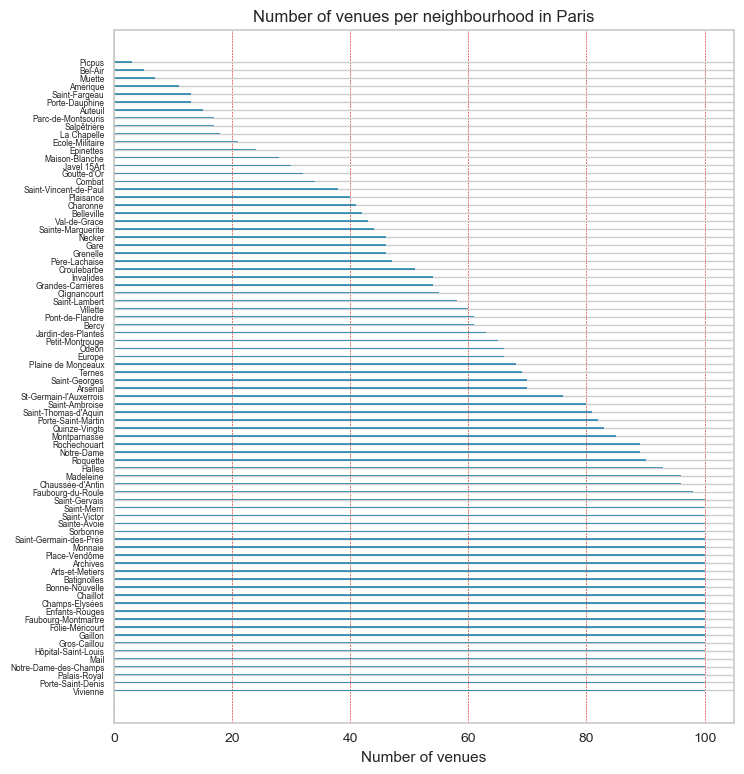

In [13]:
NbVenues = paris_venues.groupby('Neighbourhood').count()['Venue'].sort_values(ascending=False)
index = NbVenues.index
y = np.arange(len(index))
new_y = [4*i for i in y] # Espacing the bars between themselves

plt.figure(figsize=(8, 9))
plt.barh(new_y, NbVenues, align='center', alpha=0.7)
plt.yticks(new_y, index, fontsize=6, fontweight='light')
plt.grid(b=True, which='major', axis='x', color='r', linestyle='--', linewidth=0.4)
plt.xlabel('Number of venues')
plt.title('Number of venues per neighbourhood in Paris')

plt.show()

As we want to have a list of top 10 venue category for each neighbourhood, let's do some one hot encoding to process the K-Means algorithm to cluster the neighbourhood.

In [14]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
paris_onehot['Neighbourhood'] = paris_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Amérique,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Amérique,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Amérique,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amérique,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Amérique,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,Vivienne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5346,Vivienne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5347,Vivienne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5348,Vivienne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category

In [15]:
paris_grouped = paris_onehot.groupby('Neighbourhood').mean().reset_index()
paris_grouped

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Amérique,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.00,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0
1,Archives,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.00,...,0.000000,0.0,0.0,0.000000,0.020000,0.00,0.00,0.0,0.0,0.0
2,Arsenal,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.00,...,0.028571,0.0,0.0,0.000000,0.014286,0.00,0.00,0.0,0.0,0.0
3,Arts-et-Metiers,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.01,...,0.020000,0.0,0.0,0.040000,0.040000,0.02,0.00,0.0,0.0,0.0
4,Auteuil,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.00,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,St-Germain-l'Auxerrois,0.0,0.0,0.000000,0.0,0.000000,0.013158,0.00,0.0,0.00,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0
76,Ternes,0.0,0.0,0.000000,0.0,0.014493,0.000000,0.00,0.0,0.00,...,0.000000,0.0,0.0,0.014493,0.014493,0.00,0.00,0.0,0.0,0.0
77,Val-de-Grace,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.00,...,0.000000,0.0,0.0,0.000000,0.023256,0.00,0.00,0.0,0.0,0.0
78,Villette,0.0,0.0,0.016667,0.0,0.016667,0.000000,0.00,0.0,0.00,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0


Let's print each neighbourhood along with the top 5 most common venues

In [16]:
num_top_venues = 5

for neighbourhood in paris_grouped['Neighbourhood']:
    print("----"+neighbourhood+"----")
    temp = paris_grouped[paris_grouped['Neighbourhood'] == neighbourhood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amérique----
               venue  freq
0        Supermarket  0.18
1  French Restaurant  0.18
2             Bakery  0.09
3               Café  0.09
4               Park  0.09


----Archives----
               venue  freq
0  French Restaurant  0.08
1     Clothing Store  0.06
2              Hotel  0.05
3             Bistro  0.04
4        Coffee Shop  0.04


----Arsenal----
                venue  freq
0   French Restaurant  0.16
1               Hotel  0.07
2    Tapas Restaurant  0.04
3               Plaza  0.04
4  Italian Restaurant  0.04


----Arts-et-Metiers----
                venue  freq
0   French Restaurant  0.10
1               Hotel  0.06
2        Cocktail Bar  0.05
3                 Bar  0.04
4  Italian Restaurant  0.04


----Auteuil----
                 venue  freq
0         Tennis Court  0.33
1  Sporting Goods Shop  0.07
2               Museum  0.07
3           Racecourse  0.07
4              Stadium  0.07


----Batignolles----
                 venue  freq
0    French Resta

Let's put that into a dataframe, but first, let's write a function to sort the venues in descending order.

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = paris_grouped['Neighbourhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amérique,Supermarket,French Restaurant,Pool,Bed & Breakfast,Park,Café,Bistro,Bakery,Plaza,Fish & Chips Shop
1,Archives,French Restaurant,Clothing Store,Hotel,Coffee Shop,Bistro,Japanese Restaurant,Restaurant,Art Gallery,Plaza,Cocktail Bar
2,Arsenal,French Restaurant,Hotel,Italian Restaurant,Park,Plaza,Seafood Restaurant,Tapas Restaurant,Bakery,Gastropub,Pedestrian Plaza
3,Arts-et-Metiers,French Restaurant,Hotel,Cocktail Bar,Vietnamese Restaurant,Restaurant,Bar,Italian Restaurant,Wine Bar,Chinese Restaurant,Coffee Shop
4,Auteuil,Tennis Court,Garden,Plaza,Racecourse,Office,Sporting Goods Shop,Botanical Garden,Museum,Stadium,French Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
75,St-Germain-l'Auxerrois,French Restaurant,Hotel,Café,Plaza,Coffee Shop,Historic Site,Art Museum,Bar,Exhibit,Italian Restaurant
76,Ternes,French Restaurant,Italian Restaurant,Hotel,Bistro,Seafood Restaurant,Pizza Place,Bakery,Pub,Moroccan Restaurant,Japanese Restaurant
77,Val-de-Grace,French Restaurant,Bar,Hotel,Café,Creperie,Asian Restaurant,Greek Restaurant,Beer Bar,Bistro,Mexican Restaurant
78,Villette,Hotel,Bar,Café,French Restaurant,Italian Restaurant,Fast Food Restaurant,Supermarket,Bistro,Food Truck,Smoke Shop


### Merging rent data and Foursquare data

Let's add the average rent column, **normalise it and give it half the total weight in order to be as important as the venue data**.

In [19]:
# retreive average rent data and do some formating
neighborhoods_venues_sorted_rent = pd.merge(paris_grouped,
                                            cdf[['Neighbourhood', 'Average rent']],
                                            on = 'Neighbourhood',
                                            how = 'left')
nvst = neighborhoods_venues_sorted_rent #this accronym is much more readable
nvst = nvst.drop_duplicates().reset_index()
nvst = nvst.drop('index', 1)
fixed_columns = [nvst.columns[-1]] + list(nvst.columns[:-1])
nvst = nvst[fixed_columns]

# prepare data for the K-means algorithm
nvst2 = nvst.drop('Neighbourhood', 1)

# normalize all data in the chart in a new dataframe
normalize_data = (nvst2-nvst2.mean())/nvst2.std()

# give half the total weight to the rent data
normalize_data['Average rent'] = normalize_data['Average rent']*(len(normalize_data.columns)-1)
normalize_data

,Average rent,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,-588.027266,-0.158329,-0.111803,-0.292910,-0.111803,-0.381076,-0.194325,-0.159124,-0.159117,-0.326809,...,-0.464712,-0.111803,-0.158899,-0.679973,-0.931243,-0.496319,-0.282628,-0.224759,-0.111803,-0.14074
1,156.365988,-0.158329,-0.111803,-0.292910,-0.111803,-0.381076,-0.194325,-0.159124,-0.159117,-0.326809,...,-0.464712,-0.111803,-0.158899,-0.679973,0.356499,-0.496319,-0.282628,-0.224759,-0.111803,-0.14074
2,310.453221,-0.158329,-0.111803,-0.292910,-0.111803,-0.381076,-0.194325,-0.159124,-0.159117,-0.326809,...,2.637894,-0.111803,-0.158899,-0.679973,-0.011427,-0.496319,-0.282628,-0.224759,-0.111803,-0.14074
3,156.365988,-0.158329,-0.111803,-0.292910,-0.111803,-0.381076,-0.194325,-0.159124,-0.159117,2.704023,...,1.707113,-0.111803,-0.158899,2.171144,1.644242,1.593133,-0.282628,-0.224759,-0.111803,-0.14074
4,-30.998300,-0.158329,-0.111803,-0.292910,-0.111803,-0.381076,-0.194325,-0.159124,-0.159117,-0.326809,...,-0.464712,-0.111803,-0.158899,-0.679973,-0.931243,-0.496319,-0.282628,-0.224759,-0.111803,-0.14074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,310.453221,-0.158329,-0.111803,-0.292910,-0.111803,-0.381076,5.974731,-0.159124,-0.159117,-0.326809,...,-0.464712,-0.111803,-0.158899,-0.679973,-0.931243,-0.496319,-0.282628,-0.224759,-0.111803,-0.14074
76,99.216263,-0.158329,-0.111803,-0.292910,-0.111803,2.603740,-0.194325,-0.159124,-0.159117,-0.326809,...,-0.464712,-0.111803,-0.158899,0.353041,0.001904,-0.496319,-0.282628,-0.224759,-0.111803,-0.14074
77,156.365988,-0.158329,-0.111803,-0.292910,-0.111803,-0.381076,-0.194325,-0.159124,-0.159117,-0.326809,...,-0.464712,-0.111803,-0.158899,-0.679973,0.566132,-0.496319,-0.282628,-0.224759,-0.111803,-0.14074
78,-588.027266,-0.158329,-0.111803,1.926142,-0.111803,3.051462,-0.194325,-0.159124,-0.159117,-0.326809,...,-0.464712,-0.111803,-0.158899,-0.679973,-0.931243,-0.496319,-0.282628,-0.224759,-0.111803,-0.14074


### Now we have everything to run the K-Means algorithm and cluster neighbourhoods

First we need to find the optimum number of cluster to use in the K-means algorithm.
<br>To do so, we are using the Elbow method with the distortion metric., which computes the sum of squared distances from each point to its assigned centre.
<br>The distortion metric  score computes computes the sum of squared distances from each point to its assigned centre, so we should minimise it.

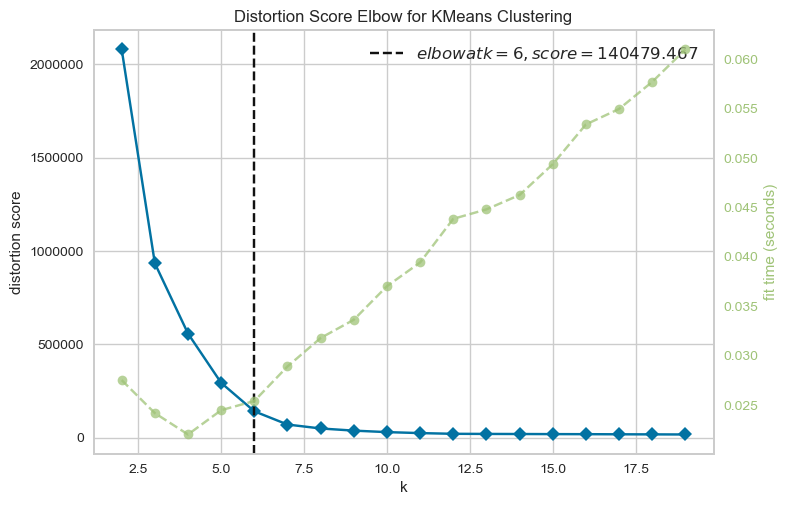

In [20]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, metric='distortion', k=(2,20))
visualizer.fit(normalize_data)   # Fit the data to the visualizer
visualizer.show()       # Finalize and render the figure

So, the optimum K - the optimum number of cluster is 6.

In [21]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(normalize_data)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 4, 0, 4, 3, 3, 1, 1, 1, 4, 4, 0, 2, 0, 1, 1, 3, 5, 4, 1, 4, 3,
       0, 1, 0, 2, 1, 1, 3, 5, 3, 1, 5, 3, 3, 2, 0, 4, 3, 0, 3, 4, 4, 0,
       5, 0, 0, 1, 3, 1, 0, 4, 3, 2, 4, 3, 1, 1, 1, 3, 1, 3, 2, 3, 0, 4,
       3, 0, 5, 4, 3, 4, 3, 3, 4, 0, 4, 4, 2, 4], dtype=int32)

Let's create a final main dataframe that includes the cluster labels, the average rent, the centre location the top 10 venues for each neighbourhood.

In [22]:
main_df = pd.merge(neighborhoods_venues_sorted,
                   cdf[['Neighbourhood', 'Average rent', 'Centre location']],
                   on = 'Neighbourhood',
                   how = 'left')

main_df['Cluster Labels'] = pd.DataFrame({'Cluster Labels': kmeans.labels_})
cols = main_df.columns.tolist()
cols = [cols[0]] + [cols[-1]] + [cols[-3]] + cols[1:-3] + [cols[-2]]
main_df = main_df[cols]

main_df

,Neighbourhood,Cluster Labels,Average rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Centre location
0,Amérique,2,21.85625,Supermarket,French Restaurant,Pool,Bed & Breakfast,Park,Café,Bistro,Bakery,Plaza,Fish & Chips Shop,"48.8816381673,2.39544016662"
1,Archives,4,28.28750,French Restaurant,Clothing Store,Hotel,Coffee Shop,Bistro,Japanese Restaurant,Restaurant,Art Gallery,Plaza,Cocktail Bar,"48.8591924127,2.36320505733"
2,Arsenal,0,29.61875,French Restaurant,Hotel,Italian Restaurant,Park,Plaza,Seafood Restaurant,Tapas Restaurant,Bakery,Gastropub,Pedestrian Plaza,"48.851585175,2.36476795387"
3,Arts-et-Metiers,4,28.28750,French Restaurant,Hotel,Cocktail Bar,Vietnamese Restaurant,Restaurant,Bar,Italian Restaurant,Wine Bar,Chinese Restaurant,Coffee Shop,"48.8664702895,2.35708313106"
4,Auteuil,3,26.66875,Tennis Court,Garden,Plaza,Racecourse,Office,Sporting Goods Shop,Botanical Garden,Museum,Stadium,French Restaurant,"48.8506223427,2.25227690754"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,St-Germain-l'Auxerrois,0,29.61875,French Restaurant,Hotel,Café,Plaza,Coffee Shop,Historic Site,Art Museum,Bar,Exhibit,Italian Restaurant,"48.8606501352,2.33491032928"
76,Ternes,4,27.79375,French Restaurant,Italian Restaurant,Hotel,Bistro,Seafood Restaurant,Pizza Place,Bakery,Pub,Moroccan Restaurant,Japanese Restaurant,"48.8811775503,2.28996373812"
77,Val-de-Grace,4,28.28750,French Restaurant,Bar,Hotel,Café,Creperie,Asian Restaurant,Greek Restaurant,Beer Bar,Bistro,Mexican Restaurant,"48.841684288,2.34386092632"
78,Villette,2,21.85625,Hotel,Bar,Café,French Restaurant,Italian Restaurant,Fast Food Restaurant,Supermarket,Bistro,Food Truck,Smoke Shop,"48.8876610888,2.37446821213"


Finally, let's visualize the resulting clusters

In [34]:
# Create the map
#address = 'Paris, FR'

#from geopy.exc import GeocoderTimedOut

#geolocator = Nominatim(user_agent="paris_explorer")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for location, neighbourhood, cluster in zip(main_df['Centre location'], main_df['Neighbourhood'], main_df['Cluster Labels']):
    label = folium.Popup(str(neighbourhood) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [location.split(',')[0], location.split(',')[1]],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## V - Results and Discussion <a name="results"></a>

Now, we can examine each cluster and determine the discriminating venue categories and discriminating rent scale that distinguish each cluster. Based on the defining categories, we then assign a label to each cluster.
<br>**French Restaurants are always the most common venue per cluster so they won't be of any help to distinguish clusters between themselves. We will barely take them into account while discriminating clusters**.

**Cluster 1 : High rent, living neighbourhoods**
<br>This cluster gathers living neighbourhoods, and to be more specific mainly touristic neighbourhoods (French Restaurant, Hotels and Boutiques are the most represented venues) with high rents (2nd highest of the 6 clusters).
<br>That cluster might not include neighbourhoods that would solve the initial problem.

In [24]:
main_df.loc[main_df['Cluster Labels'] == 0, main_df.columns[[1] + [0] + [2] + list(range(3, main_df.shape[1]-1))]]

,Cluster Labels,Neighbourhood,Average rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,0,Arsenal,29.61875,French Restaurant,Hotel,Italian Restaurant,Park,Plaza,Seafood Restaurant,Tapas Restaurant,Bakery,Gastropub,Pedestrian Plaza
11,0,Champs-Elysées,29.61875,French Restaurant,Hotel,Boutique,Women's Store,Garden,Clothing Store,Art Gallery,Italian Restaurant,Japanese Restaurant,Steakhouse
13,0,Chaussée-d'Antin,29.61875,French Restaurant,Hotel,Salad Place,Italian Restaurant,Sandwich Place,Clothing Store,Coffee Shop,Department Store,Bistro,Chinese Restaurant
22,0,Faubourg-du-Roule,29.61875,Hotel,French Restaurant,Jewelry Store,Tailor Shop,Café,Italian Restaurant,Japanese Restaurant,Lounge,Men's Store,Electronics Store
24,0,Gaillon,29.61875,Hotel,Japanese Restaurant,French Restaurant,Bookstore,Korean Restaurant,Wine Bar,Bakery,Coffee Shop,Plaza,Café
36,0,Madeleine,29.61875,Hotel,French Restaurant,Boutique,Women's Store,Gourmet Shop,Theater,Clothing Store,Salad Place,Coffee Shop,Dessert Shop
39,0,Monnaie,29.61875,French Restaurant,Hotel,Plaza,Bistro,Wine Bar,Creperie,Bar,Bookstore,Café,Cocktail Bar
43,0,Notre-Dame,29.61875,French Restaurant,Bakery,Japanese Restaurant,Ice Cream Shop,Plaza,Italian Restaurant,Coffee Shop,Wine Bar,Hotel,Tapas Restaurant
45,0,Odeon,29.61875,French Restaurant,Hotel,Café,Bistro,Bakery,Pastry Shop,Pizza Place,Plaza,Cocktail Bar,Fountain
46,0,Palais-Royal,29.61875,Japanese Restaurant,French Restaurant,Hotel,Ramen Restaurant,Coffee Shop,Plaza,Wine Bar,Café,Bistro,Italian Restaurant


**Cluster 2 : Low rent, semi-living neighbourhoods**
<br>This cluster gathers a few living neighbourhoods (Bakeries, Restaurants, Bars ans Cafés are well represented venues) with medium-high rents (2nd lowest of the 6 clusters).
<br>That cluster may include neighbourhoods that would solve the initial problem but in comparison to other clusters, it gathers more logistic venues such as Bus/Train station which are less atractive venues. It is the second most promsing cluster.

In [25]:
main_df.loc[main_df['Cluster Labels'] == 1, main_df.columns[[1] + [0] + [2] + list(range(3, main_df.shape[1]-1))]]

,Cluster Labels,Neighbourhood,Average rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,1,Bel-Air,23.80625,Sports Club,French Restaurant,Recreation Center,Plaza,Playground,Zoo Exhibit,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant
7,1,Belleville,25.13125,Bar,French Restaurant,Italian Restaurant,Café,Burger Joint,Japanese Restaurant,Beer Store,Thai Restaurant,Diner,Restaurant
8,1,Bercy,23.80625,Hotel,Bakery,Italian Restaurant,Japanese Restaurant,French Restaurant,Bar,Museum,Wine Bar,Supermarket,Bus Station
14,1,Clignancourt,24.26875,French Restaurant,Bar,Pizza Place,Italian Restaurant,Restaurant,Bistro,Supermarket,Vietnamese Restaurant,Coffee Shop,Convenience Store
15,1,Combat,23.80625,French Restaurant,Italian Restaurant,Pool,Restaurant,Park,Bar,Latin American Restaurant,Coffee Shop,Scenic Lookout,Café
19,1,Epinettes,25.13125,Restaurant,Supermarket,Japanese Restaurant,French Restaurant,Bakery,Bar,Martial Arts Dojo,Sushi Restaurant,Ethiopian Restaurant,Garden
23,1,Folie-Méricourt,25.13125,French Restaurant,Bar,Restaurant,Bakery,Italian Restaurant,Wine Bar,Pizza Place,Gym,Bistro,Hotel
26,1,Goutte-d'Or,25.13125,Bar,Bakery,Asian Restaurant,Supermarket,Chinese Restaurant,Farmers Market,Food & Drink Shop,Pizza Place,Café,Bistro
27,1,Grandes-Carrières,24.26875,French Restaurant,Bar,Hotel,Restaurant,Italian Restaurant,Pizza Place,Bistro,Park,Beer Bar,Sports Club
31,1,Hôpital-Saint-Louis,25.13125,French Restaurant,Bar,Coffee Shop,Wine Bar,Café,Pizza Place,Bistro,Thai Restaurant,Asian Restaurant,Hotel


**Cluster 3 : Low rent, dormitory neighbourhoods**
<br>This cluster gathers not really living neighbourhoods (Supermarket is the most represented venue) with really low rents (lowest of the 6 clusters).
<br>That cluster might not include neighbourhoods that would solve the initial problem.

In [26]:
main_df.loc[main_df['Cluster Labels'] == 2, main_df.columns[[1] + [0] + [2] + list(range(3, main_df.shape[1]-1))]]

,Cluster Labels,Neighbourhood,Average rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Amérique,21.85625,Supermarket,French Restaurant,Pool,Bed & Breakfast,Park,Café,Bistro,Bakery,Plaza,Fish & Chips Shop
12,2,Charonne,21.85625,Supermarket,Hotel,Pizza Place,Park,Bar,Tram Station,Bike Rental / Bike Share,Café,Music Venue,Japanese Restaurant
25,2,Gare,21.85625,Hotel,Thai Restaurant,Japanese Restaurant,French Restaurant,Sandwich Place,Café,Bus Stop,Italian Restaurant,Coffee Shop,Vietnamese Restaurant
35,2,La Chapelle,21.85625,Thai Restaurant,French Restaurant,Chinese Restaurant,Supermarket,Soccer Field,Mexican Restaurant,Diner,Gym Pool,Asian Restaurant,Farmers Market
53,2,Pont-de-Flandre,21.85625,French Restaurant,Hotel,Asian Restaurant,Restaurant,Italian Restaurant,Tram Station,Movie Theater,Music Venue,Japanese Restaurant,Café
62,2,Saint-Fargeau,21.85625,Supermarket,Bistro,Bakery,Diner,Sushi Restaurant,Tram Station,Food Truck,Bar,Plaza,Pizza Place
78,2,Villette,21.85625,Hotel,Bar,Café,French Restaurant,Italian Restaurant,Fast Food Restaurant,Supermarket,Bistro,Food Truck,Smoke Shop


**Cluster 4 : Mid-Low rent, living neighbourhoods**
<br>This cluster gathers quite living neighbourhoods (Bakeries, Restaurants, Bars ans Cafés are well represented venues) with medium-low rents (3rd lowest of the 6 clusters).
<br>That cluster may include neighbourhoods that would solve the initial problem. It is the most promising of the 6 clusters.

In [27]:
main_df.loc[main_df['Cluster Labels'] == 3, main_df.columns[[1] + [0] + [2] + list(range(3, main_df.shape[1]-1))]]

,Cluster Labels,Neighbourhood,Average rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,3,Auteuil,26.66875,Tennis Court,Garden,Plaza,Racecourse,Office,Sporting Goods Shop,Botanical Garden,Museum,Stadium,French Restaurant
5,3,Batignolles,26.30000,French Restaurant,Hotel,Italian Restaurant,Bar,Bistro,Japanese Restaurant,Restaurant,Café,Pizza Place,Park
16,3,Croulebarbe,26.38125,French Restaurant,Hotel,Bar,Sushi Restaurant,Park,Italian Restaurant,Bakery,Multiplex,Food & Drink Shop,Museum
21,3,Faubourg-Montmartre,26.38125,French Restaurant,Hotel,Burger Joint,Italian Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Bistro,Pedestrian Plaza,Bakery,Japanese Restaurant
28,3,Grenelle,26.66875,Hotel,French Restaurant,Japanese Restaurant,Bakery,Bistro,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Cheese Shop,Indian Restaurant
30,3,Halles,26.38125,French Restaurant,Bakery,Bar,Italian Restaurant,Furniture / Home Store,Clothing Store,Cocktail Bar,Sandwich Place,Chinese Restaurant,Pizza Place
33,3,Jardin-des-Plantes,26.30000,French Restaurant,Garden,Hotel,Science Museum,Museum,Zoo Exhibit,Tea Room,Bakery,Botanical Garden,Greek Restaurant
34,3,Javel 15Art,26.66875,French Restaurant,Pizza Place,Hotel,Sushi Restaurant,Japanese Restaurant,Park,Moroccan Restaurant,Fast Food Restaurant,Thrift / Vintage Store,Spanish Restaurant
38,3,Maison-Blanche,25.75625,French Restaurant,Bakery,Bistro,Plaza,Café,Pizza Place,Beer Store,Garden,Supermarket,Diner
40,3,Montparnasse,26.38125,French Restaurant,Hotel,Bistro,Bar,Italian Restaurant,Café,Bakery,Sushi Restaurant,Wine Shop,Train Station


In [28]:
solutions = main_df.loc[main_df['Cluster Labels'] == 3, main_df.columns[[1] + [0] + [2] + list(range(3, main_df.shape[1]-1))]]['Neighbourhood']

**Cluster 5 : Mid-High rent, living neighbourhoods**
<br>This cluster gathers quite living neighbourhoods (Bakeries, Restaurants, Bars ans Cafés are well represented venues) with medium-high rents (3rd highest of the 6 clusters).
<br>That cluster may include neighbourhoods that would solve the initial problem but rents are still pretty high in those neighbourhoods.

In [29]:
main_df.loc[main_df['Cluster Labels'] == 4, main_df.columns[[1] + [0] + [2] + list(range(3, main_df.shape[1]-1))]]

,Cluster Labels,Neighbourhood,Average rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,4,Archives,28.28750,French Restaurant,Clothing Store,Hotel,Coffee Shop,Bistro,Japanese Restaurant,Restaurant,Art Gallery,Plaza,Cocktail Bar
3,4,Arts-et-Metiers,28.28750,French Restaurant,Hotel,Cocktail Bar,Vietnamese Restaurant,Restaurant,Bar,Italian Restaurant,Wine Bar,Chinese Restaurant,Coffee Shop
9,4,Bonne-Nouvelle,28.28750,French Restaurant,Cocktail Bar,Bakery,Italian Restaurant,Hotel,Wine Bar,Bar,Restaurant,Coffee Shop,Pedestrian Plaza
10,4,Chaillot,28.88750,Hotel,French Restaurant,Italian Restaurant,Café,Bakery,Plaza,Art Museum,Salad Place,Japanese Restaurant,Chinese Restaurant
18,4,Enfants-Rouges,28.28750,Bistro,Wine Bar,Café,Japanese Restaurant,Coffee Shop,French Restaurant,Sandwich Place,Restaurant,Clothing Store,Cocktail Bar
20,4,Europe,28.88750,French Restaurant,Hotel,Pizza Place,Italian Restaurant,Sushi Restaurant,Thai Restaurant,Plaza,Pub,Bistro,Restaurant
37,4,Mail,28.28750,French Restaurant,Cocktail Bar,Wine Bar,Italian Restaurant,Bakery,Salad Place,Bar,Creperie,Pedestrian Plaza,Thai Restaurant
41,4,Muette,28.88750,French Restaurant,Lake,Boat or Ferry,Diner,Gym / Fitness Center,Pool,Fish & Chips Shop,English Restaurant,Ethiopian Restaurant,Exhibit
42,4,Necker,27.79375,French Restaurant,Hotel,Café,Korean Restaurant,Gym / Fitness Center,Dessert Shop,Chinese Restaurant,Restaurant,Gourmet Shop,Bakery
51,4,Plaine de Monceaux,27.79375,French Restaurant,Hotel,Italian Restaurant,Bakery,Bistro,Plaza,Japanese Restaurant,Supermarket,Café,Pizza Place


**Cluster 6 : High rent, dormitory neighbourhoods**
<br>This cluster gathers not really living neighbourhoods (French Restaurant, Hotels and Art places are the most represented venues but in those neighbourhoods they are classy and really expensive) with really high rents (highest of the 6 clusters).
<br>That cluster might not include neighbourhoods that would solve the initial problem.

In [30]:
main_df.loc[main_df['Cluster Labels'] == 5, main_df.columns[[1] + [0] + [2] + list(range(3, main_df.shape[1]-1))]]

,Cluster Labels,Neighbourhood,Average rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,5,Ecole-Militaire,31.375,Hotel,French Restaurant,Plaza,Historic Site,Dessert Shop,Diner,Pastry Shop,Café,Farmers Market,Garden
29,5,Gros-Caillou,31.375,French Restaurant,Italian Restaurant,Hotel,Café,Bakery,Coffee Shop,Bistro,Ice Cream Shop,Vietnamese Restaurant,Dessert Shop
32,5,Invalides,31.375,French Restaurant,Hotel,Plaza,Café,History Museum,Italian Restaurant,Park,Art Museum,Coffee Shop,Japanese Restaurant
44,5,Notre-Dame-des-Champs,31.375,French Restaurant,Hotel,Bakery,Bistro,Italian Restaurant,Steakhouse,Creperie,Café,Japanese Restaurant,Tea Room
68,5,Saint-Thomas-d'Aquin,31.375,French Restaurant,Hotel,Café,Italian Restaurant,Bakery,Coffee Shop,Garden,Tailor Shop,Sandwich Place,Art Gallery


## VI - Conclusion <a name="conclusion"></a>

Purpose of this project was to find living neighbourhoods in Paris with low or medium rent. To do so, we have gathered rent and location data from Paris Data and venues data from Foursquare. We used Elbow method and K-means clustering algorithm.

In [36]:
print('As a result, the neighbourhoods that better solve the initial problem are : \n', solutions)

As a result, the neighbourhoods that better solve the initial problem are : 
 4                   Auteuil
5               Batignolles
16              Croulebarbe
21      Faubourg-Montmartre
28                 Grenelle
30                   Halles
33       Jardin-des-Plantes
34              Javel 15Art
38           Maison-Blanche
40             Montparnasse
48          Petit-Montrouge
52                Plaisance
55        Porte-Saint-Denis
59             Rochechouart
61           Saint-Ambroise
63            Saint-Georges
66            Saint-Lambert
70    Saint-Vincent-de-Paul
72        Sainte-Marguerite
73              Salpêtrière
Name: Neighbourhood, dtype: object


Thank you for reading me through all this.
<br>Ilan Benchetrit

## VII - Sources <a name="sources"></a>

[1] : INSEE, https://www.insee.fr/fr/statistiques/2534314?geo=COM-75056
<br>[2] : Paris Data, https://opendata.paris.fr/explore/dataset/logement-encadrement-des-loyers/information/?disjunctive.id_zone&disjunctive.nom_quartier&disjunctive.piece&disjunctive.epoque&disjunctive.meuble_txt
<br>[3] : Paris Data, https://parisdata.opendatasoft.com/explore/dataset/quartier_paris/information/
<br>[4] : Foursquare, https://developer.foursquare.com/